# **Forest Fire Prediction**</br>


---


Tugas :</br>
Memprediksi potensi luasan area yang terbakar oleh api atau potensi terjadinya kebakaran hutan berdasarkan data-data meteorologi

Melakukan minimal 6 eksperimen berbasiskan algoritma Deep Learning dengan dataset berikut dan sertakan analisa berdasarkan hasil-hasil yang diberikan oleh eksperimen tersebut


# About Task
Pada kasus ini saya memilih untuk melakukan klasifikasi, namun jika melihat pada dataset, hal ini sepertinya cukup sulit dilakukan jika hanya **mengklasifikasikan kebakaran atau tidak kebakaran**, karena jumlah area kebakaran yang tersedia di feature **area**

Pada akhirnya, saya akan memilih untuk melakukan **klasifikasi multi-class** dimana prediksi ini akan dihasilkan melalui 2 proses :  
1. Menentukan 6 kelas
2. Pelabelan datanya

# Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

In [ ]:
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### **Attribute Information**
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 </br>
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

### Dataset Information

In [ ]:
#shape
dataset.shape

(517, 13)

In [ ]:
#check info, null dan tipe data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [ ]:
#check unique object
#melihat apakah ada unwanted data pada dataset
for i in dataset.columns:
  print('Column : ',i)
  print(dataset[i].unique())
  print('===========================')
  print(' ')

Column :  X
[7 8 6 5 4 2 9 1 3]
 
Column :  Y
[5 4 6 3 2 9 8]
 
Column :  month
['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
 
Column :  day
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
 
Column :  FFMC
[86.2 90.6 91.7 89.3 92.3 91.5 91.  92.5 92.8 63.5 90.9 92.9 93.3 84.9
 89.2 86.3 91.8 94.3 90.2 93.5 91.4 92.4 93.4 88.6 90.3 90.  88.1 79.5
 94.8 90.1 94.2 87.2 87.6 92.1 92.6 84.  86.6 93.  91.1 91.2 88.8 84.2
 89.7 83.9 69.  82.1 85.9 84.4 68.2 93.7 85.8 95.5 95.2 96.  85.6 81.5
 86.8 93.9 90.8 90.7 88.3 92.2 81.9 88.  83.  93.1 91.9 91.6 87.5 93.6
 84.6 85.4 84.7 86.9 85.2 90.4 53.4 85.1 89.6 50.4 88.2 92.  18.7 90.5
 84.1 85.  87.9 94.6 87.1 92.7 88.9 89.4 94.  75.1 91.3 93.2 94.9 95.
 95.1 95.8 95.9 96.2 96.1 94.5 81.6 94.4]
 
Column :  DMC
[ 26.2  35.4  43.7  33.3  51.3  85.3  88.9 145.4 129.5  88.   73.2  70.8
 126.5 133.3 141.2  35.8  32.8  27.9  27.4  78.5  96.3 110.9 139.4 142.4
 117.9 149.3  85.1  91.8  69.7  75.6  80.7  41.5  25.7  60.6  96.9 10

Hasil : Tidak ditemukan kejanggalan data

### Persebaran Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


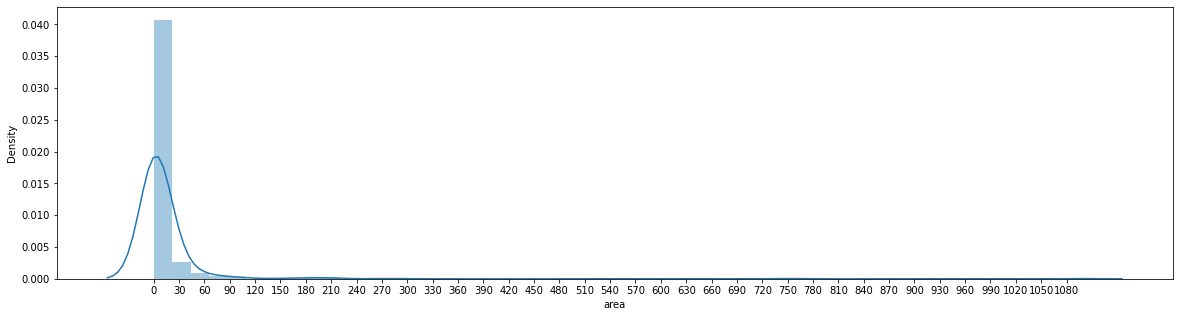

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.distplot(dataset['area'])
plt.xticks([i for i in range(0,1100,30)])
plt.show()

## Data Exploration

# Feature Engineering

### Memahami konteks dataset
untuk permasalahan klasifikasi, dataset saat ini tidak memiliki label target.

Opsi yang dapat dilihat untuk mengklasifikasikan dataset menjadi 2 cara :   
1.   Menggunakan analisa univariate dari feature area (menunjukan kebakaran) label dapat dihasilkan dengan memberikan penilaian (0 = safe dan >0 = kebakaran)
2.   Memahami secara luas kategori data secaara analisa multivariate. Dalam standar Values of fire weather indices, teradapat beberapa parameter acuan yang dapat digunakan sebagai kelompok data, yaitu klasifikasi Low, Moderate, High dan Very High & Extreame, hal ini dapat dijadikan rujukan dengan mengkombinasikan keparahan luas area terbakar dari feature 'area'



Tabel Values of fire weather indices </br>
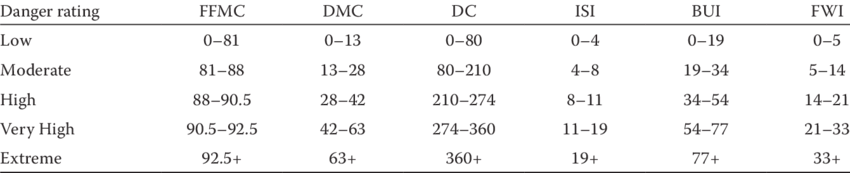

**Disini saya akan mencoba mengunakan opsi nomor 2**

### Multivariate with Unsupervised Algorithm

karena konteks area aman (nilai area = 0) maka perlu splitting dataset dengan nilai lebih dari 0 (sebagai dataset terjadinya kebakaran)

### Splitting Dataset

In [ ]:
datasetFire = dataset[dataset['area'] > 0]
datasetFire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29


In [ ]:
#Feature yang akan digunakan dalam proses pelabelan data
fireIndicator = ['FFMC', 'DMC', 'DC', 'ISI','area']

In [ ]:
firePred = datasetFire[['FFMC', 'DMC', 'DC', 'ISI','area']]
firePred.describe()

,FFMC,DMC,DC,ISI,area
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,91.034074,114.707778,570.867037,9.177037,24.600185
std,3.709020,61.786520,229.981242,4.147350,86.501635
min,63.500000,3.200000,15.300000,0.800000,0.090000
25%,90.325000,82.900000,486.500000,6.800000,2.140000
50%,91.700000,111.700000,665.600000,8.400000,6.370000
75%,92.975000,141.300000,721.325000,11.375000,15.422500
max,96.200000,291.300000,860.600000,22.700000,1090.840000


In [ ]:
# Scaling dengan Robust Scaling
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [ ]:
#Fungsi Normalisasi Robust Scaling
def robustScal(dtframe,label):
    dtframe[label] = rs.fit_transform(dtframe[[label]])

In [ ]:
#Proses Normalisasi
for column in fireIndicator:
    robustScal(firePred,column)
firePred.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,FFMC,DMC,DC,ISI,area
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,-0.251293,0.051503,-0.403419,0.169844,1.372497
std,1.399630,1.057988,0.979373,0.906525,6.512451
min,-10.641509,-1.857877,-2.769296,-1.661202,-0.472803
25%,-0.518868,-0.493151,-0.762696,-0.349727,-0.318464
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.481132,0.506849,0.237304,0.650273,0.681536
max,1.698113,3.075342,0.830406,3.125683,81.646527


### Reduce the dimensions using Principal Component Analysis (PCA)

saya akan melakukan pelabelan data secara unsupervised menggunakan KMeans, masalah pertama adalah dataset **firePred** merupakan high dimensional data sehingga perlu dilakukan reduksi dimensi data dengan menggunakan PCA

In [ ]:
#import library
from sklearn.decomposition import PCA

In [ ]:
pca_5fire = PCA(n_components=5)
pca_5fire_result = pca_5fire.fit_transform(firePred)

### Clustering with KMeans untuk Label

In [ ]:
from sklearn.cluster import KMeans

**Menggunakan n = 5** </br>
sesuai klasifikasi cluster dari **Values of fire weather indices**

In [ ]:
# Klasterisasi menggunakan KMeans (karena tanpa label)   
kmeans = KMeans(n_clusters=5)
kmeans.fit(firePred)

KMeans(n_clusters=5)

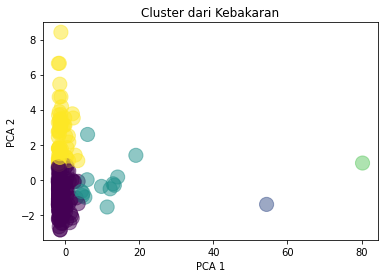

In [ ]:
x = pca_5fire_result[:, 0]
y = pca_5fire_result[:, 1]

scatter = plt.scatter(x, y, c=kmeans.labels_, alpha=0.5, s= 200)
plt.title('Cluster dari Kebakaran')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

In [ ]:
#copy data array
labelclass = kmeans.labels_

In [ ]:
#menaikan 1 nilai untuk mencegah label class = 0 (karena 0 = tidak ada kebakaran)
for index in range(len(labelclass)):
      labelclass[index] = labelclass[index] +1

In [ ]:
#adding new label ke dataset fire
datasetFire['class'] = labelclass.tolist()
datasetFire

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,class
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,5
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,1
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,1
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,1
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,1
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,1
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,5
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,5


### Menggabungkan dataset

In [ ]:
#copy dataset dengan label 0
datasetSafe = dataset[dataset['area'] == 0]
datasetSafe

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


In [ ]:
#memasukan label class = 0 (aman / tidak ada kebakaran)
datasetSafe['class'] = np.zeros(247).tolist()
datasetSafe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,class
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0,0.0
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0,0.0
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.0,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0,0.0


In [ ]:
#Menggabungkan dataset fire dan dataset safe
frames = [datasetSafe, datasetFire]
newDf = pd.concat(frames)
newDf = newDf.reset_index()
newDf.drop('index', axis=1, inplace=True)
newDf

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,class
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,1.0
513,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,1.0
514,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,5.0
515,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,5.0


### Encoding Label ke nilai integer

**Data bulan**

In [ ]:
newDf['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'may', 'nov', 'dec'], dtype=object)

In [ ]:
newDf['month'].replace({'jan': '1','feb': '2','mar': '3','apr': '4','may': '5',
                        'jun': '6','jul': '7','aug': '8','sep': '9','oct': '10',
                        'nov': '11','dec': '12'}, inplace=True)
newDf["month"] = pd.to_numeric(newDf["month"])

**Data hari**

In [ ]:
newDf['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [ ]:
newDf['day'].replace({'mon': '1','tue': '2','wed': '3','thu': '4','fri': '5',
                        'sat': '6','sun': '7'}, inplace=True)
newDf["day"] = pd.to_numeric(newDf["day"])

In [ ]:
newDf.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,class
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,1.052224
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,1.577206
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,5.000000


### Dropping Feature Area

In [ ]:
newDf.drop('area', axis=1, inplace=True)

# Visualization

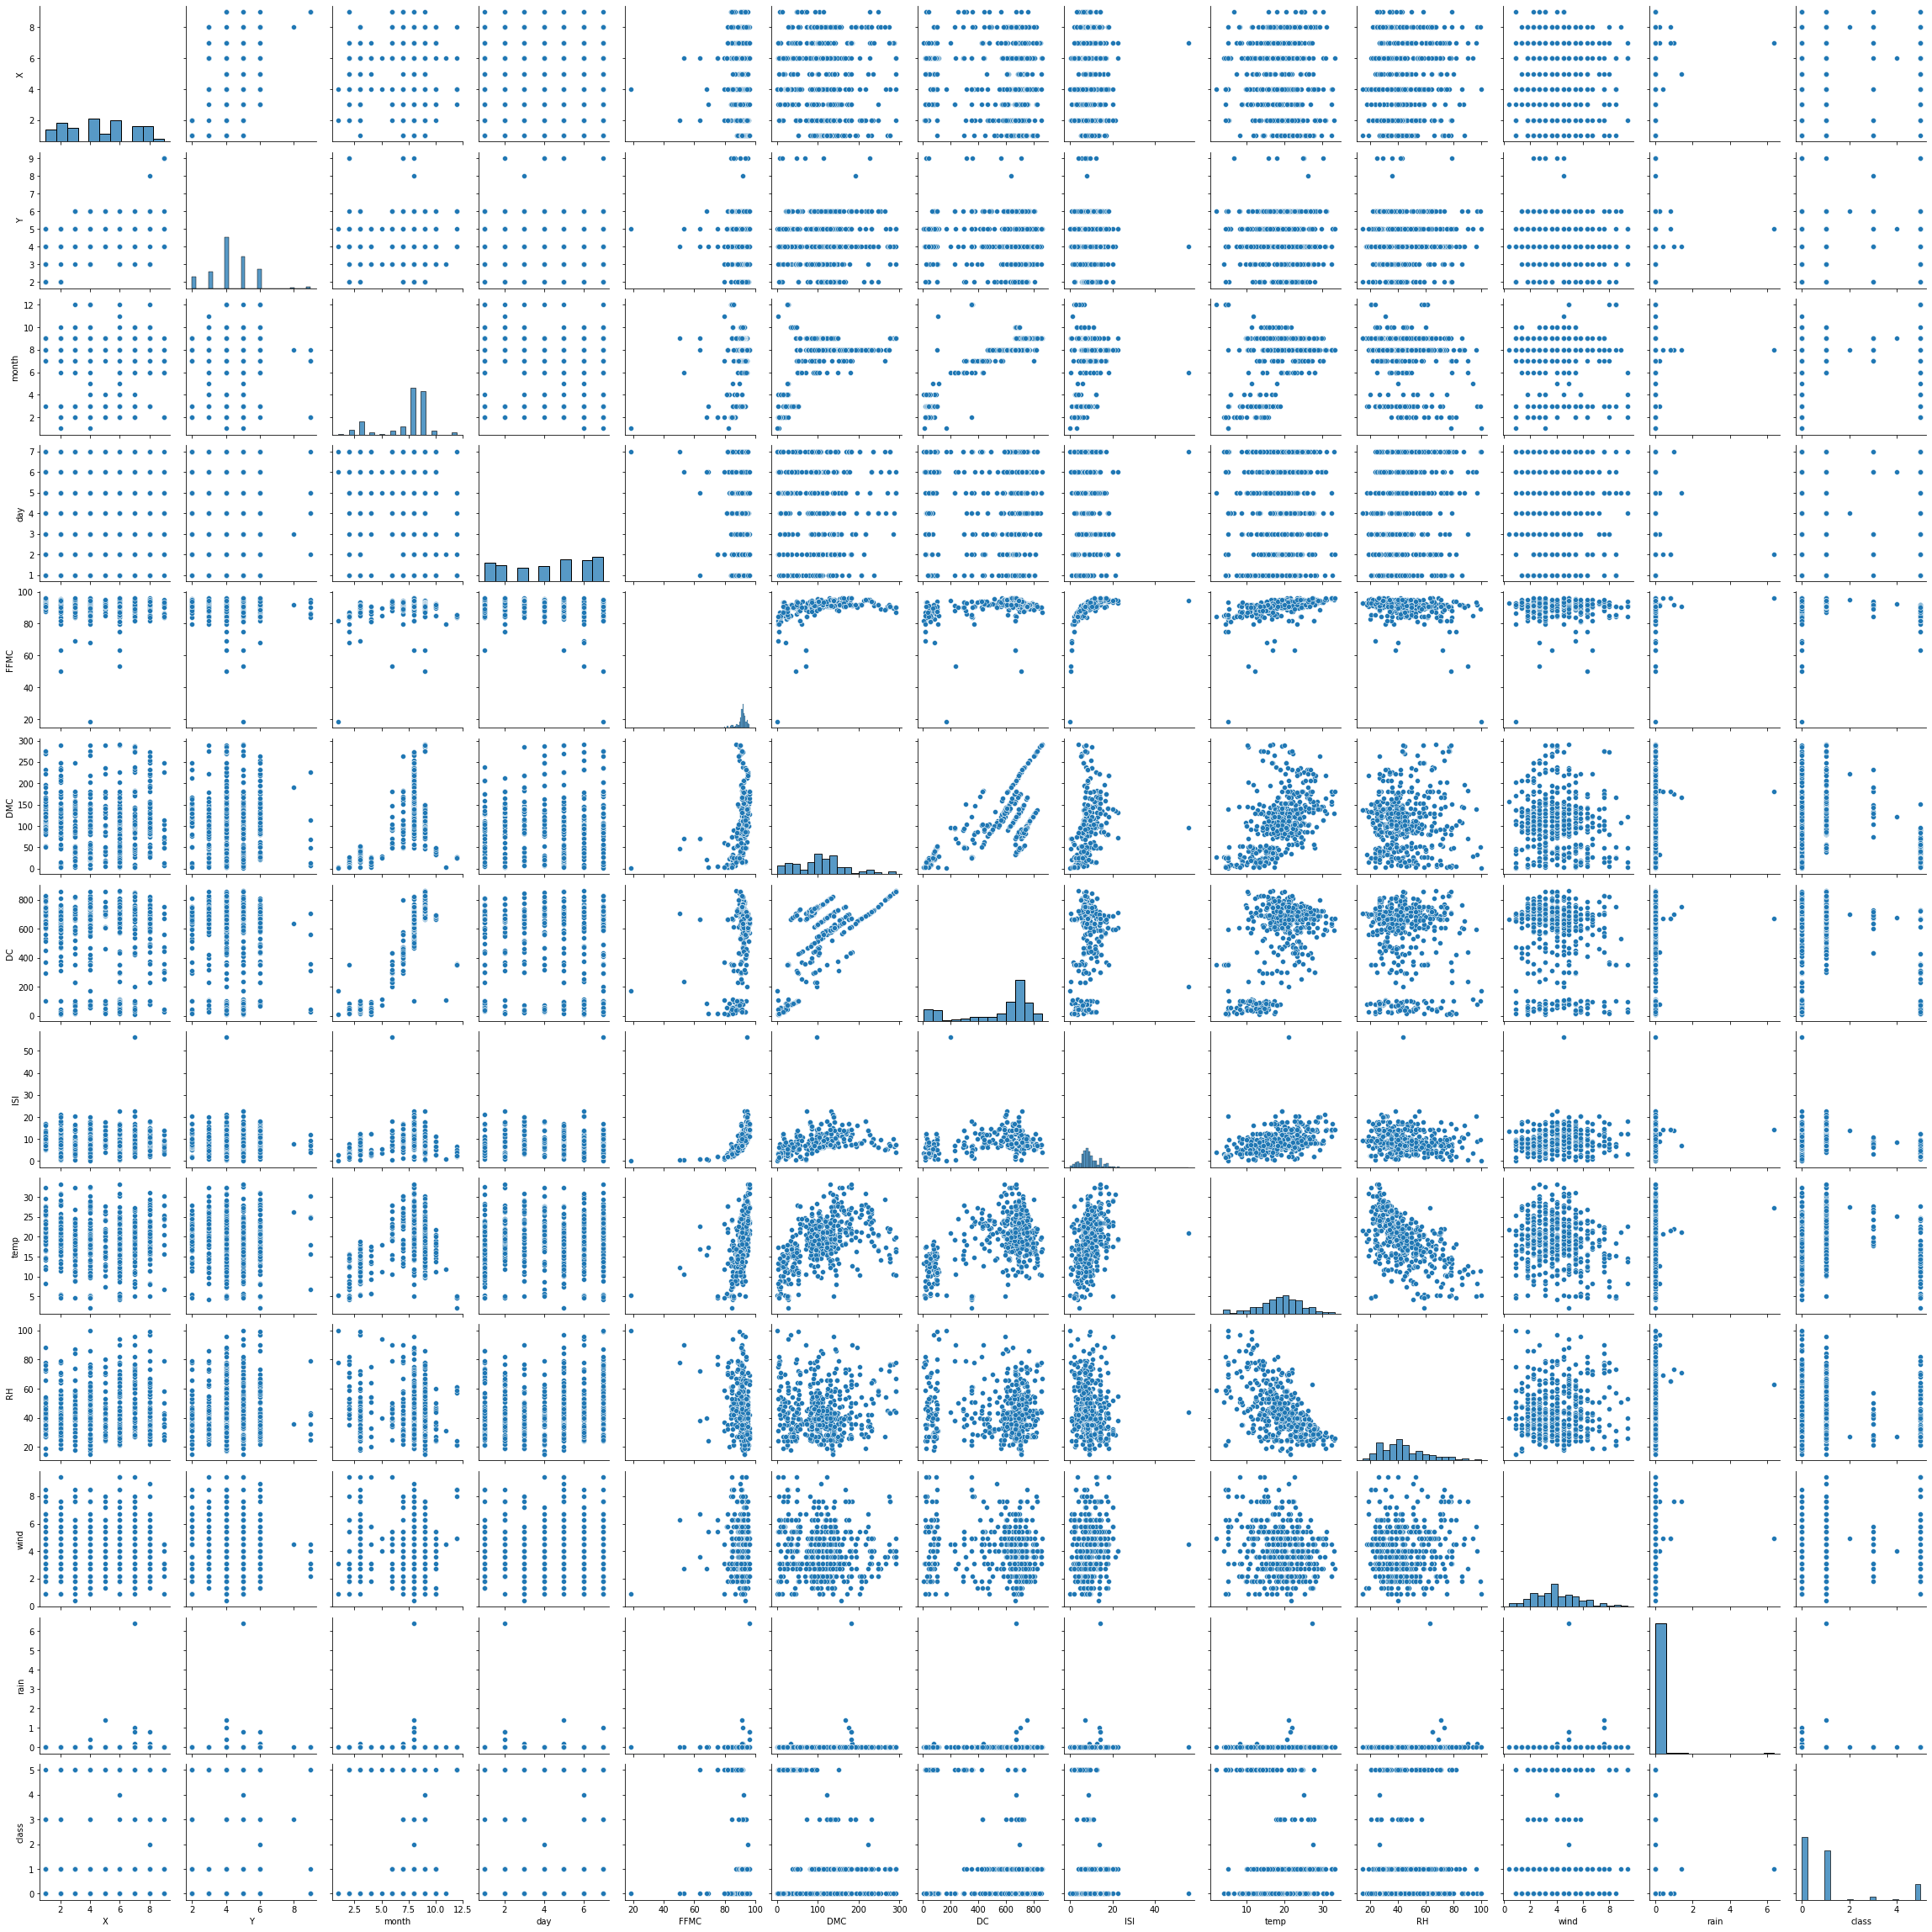

In [ ]:
sns.pairplot(newDf)

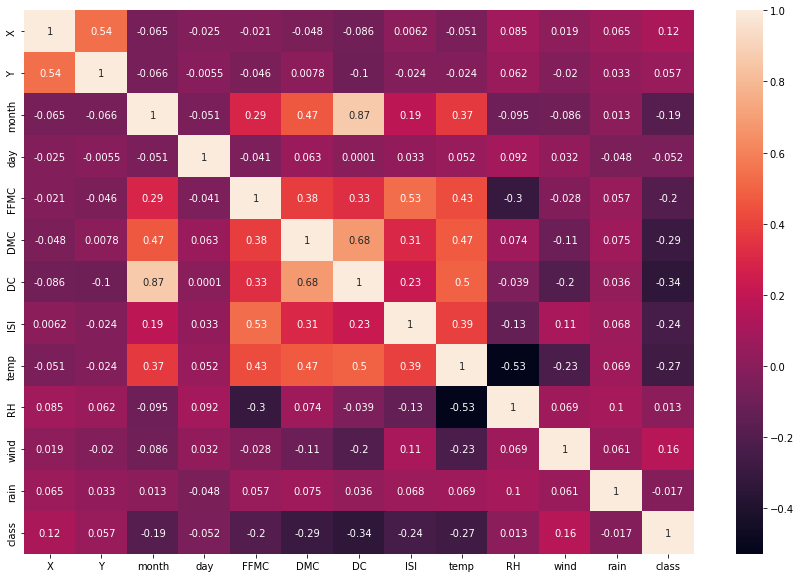

In [ ]:
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(newDf.corr(), annot=True,ax=ax)
plt.show()

# Modelling

In [ ]:
# split into train & test
X = newDf.iloc[:,:-1].values
y = newDf.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=4)
#karena data cendrung berurutan maka digunakann random state

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential

## Model Training & Evaluation

### Model 1
**Hyperparameter Information :**
*   Epoch = 250
*   Batch Size = 50
*   Activation Function = softmax
*   Loss Function = sparse_categorical_crossentropy
*   Learning Rate  = 0.03
*   Optimizer  = adam
*   Number of Layers = 2

In [ ]:
# build model
model1 = Sequential()
model1.add(Dense(16, input_shape=(12,), activation='relu'))
model1.add(Dense(6, activation='softmax'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.03)
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(XTrain, yTrain, validation_data=(XTest, yTest), epochs=250, batch_size=50, verbose=1)

Epoch 1/250
8/8 [==============================] - 1s 30ms/step - loss: 50.4440 - accuracy: 0.2770 - val_loss: 15.3155 - val_accuracy: 0.4423
Epoch 2/250
8/8 [==============================] - 0s 5ms/step - loss: 13.2581 - accuracy: 0.4737 - val_loss: 10.1723 - val_accuracy: 0.4295
Epoch 3/250
8/8 [==============================] - 0s 6ms/step - loss: 7.5696 - accuracy: 0.4737 - val_loss: 6.2051 - val_accuracy: 0.4744
Epoch 4/250
8/8 [==============================] - 0s 5ms/step - loss: 5.9140 - accuracy: 0.4820 - val_loss: 6.1860 - val_accuracy: 0.4808
Epoch 5/250
8/8 [==============================] - 0s 5ms/step - loss: 4.2927 - accuracy: 0.4515 - val_loss: 3.0276 - val_accuracy: 0.4744
Epoch 6/250
8/8 [==============================] - 0s 8ms/step - loss: 3.6973 - accuracy: 0.4543 - val_loss: 3.0272 - val_accuracy: 0.4423
Epoch 7/250
8/8 [==============================] - 0s 8ms/step - loss: 3.0702 - accuracy: 0.4737 - val_loss: 4.6031 - val_accuracy: 0.4872
Epoch 8/250
8/8 [=====

### Model 2
**Hyperparameter Information :**
*   Epoch = 350
*   Batch Size = 50
*   Activation Function = softmax
*   Loss Function = kullback_leibler_divergence
*   Learning Rate  = 0.01
*   Optimizer  = adam
*   Number of Layers = 3

In [ ]:
# build model
model2 = Sequential()
model2.add(Dense(16, input_shape=(12,), activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(6, activation='softmax'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model2.compile(loss='kullback_leibler_divergence',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(XTrain, yTrain, validation_data=(XTest, yTest), epochs=350, batch_size=50, verbose=1)

Epoch 1/350
8/8 [==============================] - 1s 24ms/step - loss: 40.9197 - accuracy: 0.4155 - val_loss: 40.0067 - val_accuracy: 0.4551
Epoch 2/350
8/8 [==============================] - 0s 6ms/step - loss: 39.8677 - accuracy: 0.3989 - val_loss: 38.0669 - val_accuracy: 0.3846
Epoch 3/350
8/8 [==============================] - 0s 8ms/step - loss: 38.4073 - accuracy: 0.3850 - val_loss: 37.9018 - val_accuracy: 0.4744
Epoch 4/350
8/8 [==============================] - 0s 8ms/step - loss: 35.9368 - accuracy: 0.3463 - val_loss: 33.5312 - val_accuracy: 0.3526
Epoch 5/350
8/8 [==============================] - 0s 8ms/step - loss: 31.8619 - accuracy: 0.1884 - val_loss: 32.2699 - val_accuracy: 0.0449
Epoch 6/350
8/8 [==============================] - 0s 7ms/step - loss: 29.1878 - accuracy: 0.2548 - val_loss: 25.5908 - val_accuracy: 0.1731
Epoch 7/350
8/8 [==============================] - 0s 8ms/step - loss: 24.2742 - accuracy: 0.2050 - val_loss: 19.6471 - val_accuracy: 0.1987
Epoch 8/350


### Model 3
**Hyperparameter Information :**
*   Epoch = 350
*   Batch Size = 50
*   Activation Function = softmax
*   Loss Function = sparse_categorical_crossentropy
*   Learning Rate  = 0.01
*   Optimizer  = adam
*   Number of Layers = 4

In [ ]:
# build model
model3 = Sequential()
model3.add(Dense(16, input_shape=(12,), activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(6, activation='softmax'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(XTrain, yTrain, validation_data=(XTest, yTest), epochs=350, batch_size=50, verbose=1)

Epoch 1/350
8/8 [==============================] - 1s 32ms/step - loss: 15.1724 - accuracy: 0.4266 - val_loss: 3.4666 - val_accuracy: 0.2756
Epoch 2/350
8/8 [==============================] - 0s 6ms/step - loss: 3.5952 - accuracy: 0.4543 - val_loss: 2.0816 - val_accuracy: 0.4423
Epoch 3/350
8/8 [==============================] - 0s 8ms/step - loss: 1.5810 - accuracy: 0.4294 - val_loss: 1.3599 - val_accuracy: 0.4744
Epoch 4/350
8/8 [==============================] - 0s 8ms/step - loss: 1.3024 - accuracy: 0.4931 - val_loss: 1.3086 - val_accuracy: 0.4615
Epoch 5/350
8/8 [==============================] - 0s 8ms/step - loss: 1.1927 - accuracy: 0.4765 - val_loss: 1.1152 - val_accuracy: 0.5000
Epoch 6/350
8/8 [==============================] - 0s 8ms/step - loss: 1.1405 - accuracy: 0.5291 - val_loss: 1.0043 - val_accuracy: 0.5128
Epoch 7/350
8/8 [==============================] - 0s 8ms/step - loss: 1.0056 - accuracy: 0.5152 - val_loss: 0.9976 - val_accuracy: 0.5000
Epoch 8/350
8/8 [========

### Model 4
**Hyperparameter Information :**
*   Epoch = 350
*   Batch Size = all data
*   Activation Function = softmax
*   Loss Function = sparse_categorical_crossentropy
*   Learning Rate  = 0.01
*   Optimizer  = adam
*   Number of Layers = 3

In [ ]:
# build model
model4 = Sequential()
model4.add(Dense(16, input_shape=(12,), activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(6, activation='softmax'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model4.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history4 = model4.fit(XTrain, yTrain, validation_data=(XTest, yTest), epochs=350, batch_size=len(XTrain), verbose=1)

Epoch 1/350
1/1 [==============================] - 1s 537ms/step - loss: 36.3827 - accuracy: 0.2271 - val_loss: 28.8513 - val_accuracy: 0.4744
Epoch 2/350
1/1 [==============================] - 0s 27ms/step - loss: 28.2866 - accuracy: 0.4377 - val_loss: 16.6698 - val_accuracy: 0.3846
Epoch 3/350
1/1 [==============================] - 0s 30ms/step - loss: 16.2937 - accuracy: 0.3102 - val_loss: 7.1090 - val_accuracy: 0.4103
Epoch 4/350
1/1 [==============================] - 0s 56ms/step - loss: 7.2702 - accuracy: 0.3795 - val_loss: 10.7317 - val_accuracy: 0.4038
Epoch 5/350
1/1 [==============================] - 0s 31ms/step - loss: 11.1725 - accuracy: 0.4017 - val_loss: 9.5517 - val_accuracy: 0.4103
Epoch 6/350
1/1 [==============================] - 0s 32ms/step - loss: 9.8602 - accuracy: 0.4044 - val_loss: 5.4330 - val_accuracy: 0.4744
Epoch 7/350
1/1 [==============================] - 0s 29ms/step - loss: 5.5721 - accuracy: 0.4820 - val_loss: 7.1388 - val_accuracy: 0.4679
Epoch 8/350


### Model 5
**Hyperparameter Information :**
*   Epoch = 350
*   Batch Size = all
*   Activation Function = softmax
*   Loss Function = sparse_categorical_crossentropy
*   Learning Rate  = 0.01
*   Optimizer  = adam
*   Number of Layers = 5

In [ ]:
# build model
model5 = Sequential()
model5.add(Dense(16, input_shape=(12,), activation='relu'))
model5.add(Dense(20, activation='relu'))
model5.add(Dense(30, activation='relu'))
model5.add(Dense(36, activation='relu'))
model5.add(Dense(6, activation='tanh'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model5.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history5 = model5.fit(XTrain, yTrain, validation_data=(XTest, yTest), epochs=350, batch_size=len(XTrain), verbose=1)

Epoch 1/350
1/1 [==============================] - 1s 690ms/step - loss: 13.3627 - accuracy: 0.0859 - val_loss: 1.7918 - val_accuracy: 0.4872
Epoch 2/350
1/1 [==============================] - 0s 30ms/step - loss: 1.7918 - accuracy: 0.4737 - val_loss: 1.7918 - val_accuracy: 0.4359
Epoch 3/350
1/1 [==============================] - 0s 35ms/step - loss: 1.7918 - accuracy: 0.4238 - val_loss: 1.7918 - val_accuracy: 0.4038
Epoch 4/350
1/1 [==============================] - 0s 32ms/step - loss: 1.7918 - accuracy: 0.3989 - val_loss: 1.7918 - val_accuracy: 0.4038
Epoch 5/350
1/1 [==============================] - 0s 31ms/step - loss: 1.7918 - accuracy: 0.3878 - val_loss: 1.7918 - val_accuracy: 0.3974
Epoch 6/350
1/1 [==============================] - 0s 28ms/step - loss: 1.7918 - accuracy: 0.3850 - val_loss: 1.7918 - val_accuracy: 0.3974
Epoch 7/350
1/1 [==============================] - 0s 28ms/step - loss: 1.7918 - accuracy: 0.3823 - val_loss: 1.7918 - val_accuracy: 0.3910
Epoch 8/350
1/1 [=

### Model 6
**Hyperparameter Information :**
*   Epoch = 250
*   Batch Size = 50
*   Activation Function = softmax
*   Loss Function = categorical_crossentropy
*   Learning Rate  = 0.03
*   Optimizer  = adam
*   Number of Layers = 2

In [ ]:
# build model
model6 = Sequential()
model6.add(Dense(16, input_shape=(12,), activation='relu'))
model6.add(Dense(32, activation='relu'))
model6.add(Dense(6, activation='relu'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model6.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history6 = model6.fit(XTrain, yTrain, validation_data=(XTest, yTest), epochs=350, batch_size=50, verbose=1)

Epoch 1/350
8/8 [==============================] - 1s 29ms/step - loss: 13.3979 - accuracy: 0.0942 - val_loss: 13.5614 - val_accuracy: 0.0897
Epoch 2/350
8/8 [==============================] - 0s 6ms/step - loss: 13.3028 - accuracy: 0.0942 - val_loss: 13.4708 - val_accuracy: 0.0769
Epoch 3/350
8/8 [==============================] - 0s 8ms/step - loss: 11.8729 - accuracy: 0.1357 - val_loss: 9.2685 - val_accuracy: 0.2051
Epoch 4/350
8/8 [==============================] - 0s 8ms/step - loss: 3.0948 - accuracy: 0.4044 - val_loss: 1.6183 - val_accuracy: 0.4359
Epoch 5/350
8/8 [==============================] - 0s 6ms/step - loss: 1.7956 - accuracy: 0.4598 - val_loss: 2.0094 - val_accuracy: 0.4744
Epoch 6/350
8/8 [==============================] - 0s 8ms/step - loss: 1.9508 - accuracy: 0.4737 - val_loss: 1.9864 - val_accuracy: 0.4744
Epoch 7/350
8/8 [==============================] - 0s 9ms/step - loss: 1.9905 - accuracy: 0.4709 - val_loss: 2.0780 - val_accuracy: 0.4872
Epoch 8/350
8/8 [====

### Selecting Model

**Model 1**

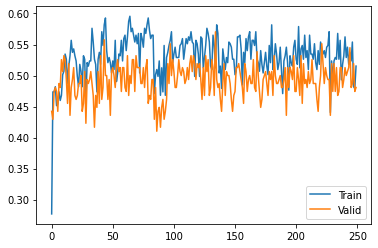

In [ ]:
plt.plot(history1.history['accuracy'], label='Train')
plt.plot(history1.history['val_accuracy'], label='Valid')
plt.legend()

**Model 2**

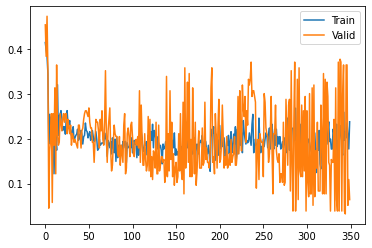

In [ ]:
plt.plot(history2.history['accuracy'], label='Train')
plt.plot(history2.history['val_accuracy'], label='Valid')
plt.legend()

**Model 3**

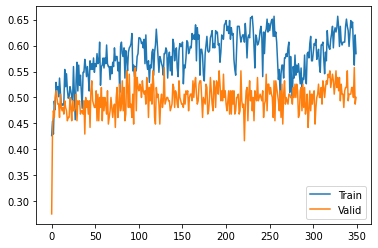

In [ ]:
plt.plot(history3.history['accuracy'], label='Train')
plt.plot(history3.history['val_accuracy'], label='Valid')
plt.legend()

**Model 4**

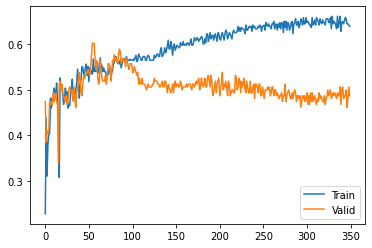

In [ ]:
plt.plot(history4.history['accuracy'], label='Train')
plt.plot(history4.history['val_accuracy'], label='Valid')
plt.legend()

**Model 5**

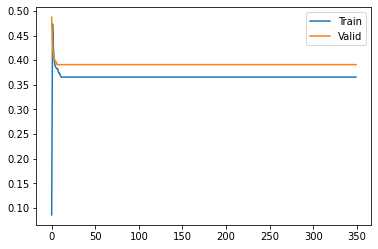

In [ ]:
plt.plot(history5.history['accuracy'], label='Train')
plt.plot(history5.history['val_accuracy'], label='Valid')
plt.legend()

**Model 6**

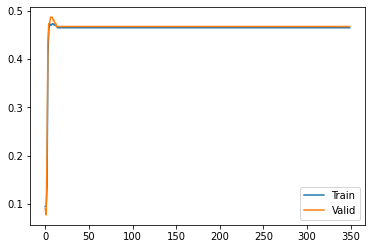

In [ ]:
plt.plot(history6.history['accuracy'], label='Train')
plt.plot(history6.history['val_accuracy'], label='Valid')
plt.legend()

Selected Model : Model 4

## Performance Improvement

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
# build model
model_final = Sequential()
model_final.add(Dense(16, input_shape=(12,), activation='relu'))
model_final.add(Dense(32, activation='relu'))
model_final.add(Dense(6, activation='softmax'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model_final.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Early Stopping

In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

### Model Checkpoint

In [ ]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

### Run Model & Eval

In [ ]:
#model
history = model_final.fit(XTrain, yTrain, validation_data=(XTest, yTest), epochs=1000, 
                    batch_size=len(XTrain), verbose=0, callbacks=[es, mc])


Epoch 1: val_accuracy improved from -inf to 0.49359, saving model to best_model.h5

Epoch 2: val_accuracy improved from 0.49359 to 0.50641, saving model to best_model.h5

Epoch 3: val_accuracy did not improve from 0.50641

Epoch 4: val_accuracy did not improve from 0.50641

Epoch 5: val_accuracy did not improve from 0.50641

Epoch 6: val_accuracy did not improve from 0.50641

Epoch 7: val_accuracy did not improve from 0.50641

Epoch 8: val_accuracy did not improve from 0.50641

Epoch 9: val_accuracy did not improve from 0.50641

Epoch 10: val_accuracy did not improve from 0.50641

Epoch 11: val_accuracy did not improve from 0.50641

Epoch 12: val_accuracy did not improve from 0.50641

Epoch 13: val_accuracy did not improve from 0.50641

Epoch 14: val_accuracy did not improve from 0.50641

Epoch 15: val_accuracy did not improve from 0.50641

Epoch 16: val_accuracy did not improve from 0.50641

Epoch 17: val_accuracy did not improve from 0.50641

Epoch 18: val_accuracy did not improve f

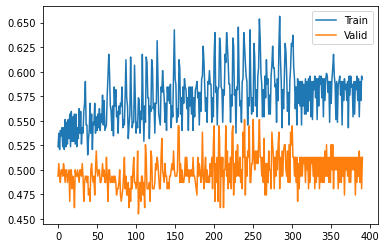

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()